# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [1]:
import pandas as pd
import numpy as np

# Viz
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,8.)})
sns.set_style("whitegrid")

from sklearn.linear_model import LinearRegression
from sklearn import metrics

import statsmodels.formula.api as smf

C:\Users\Marc\miniconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [2]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

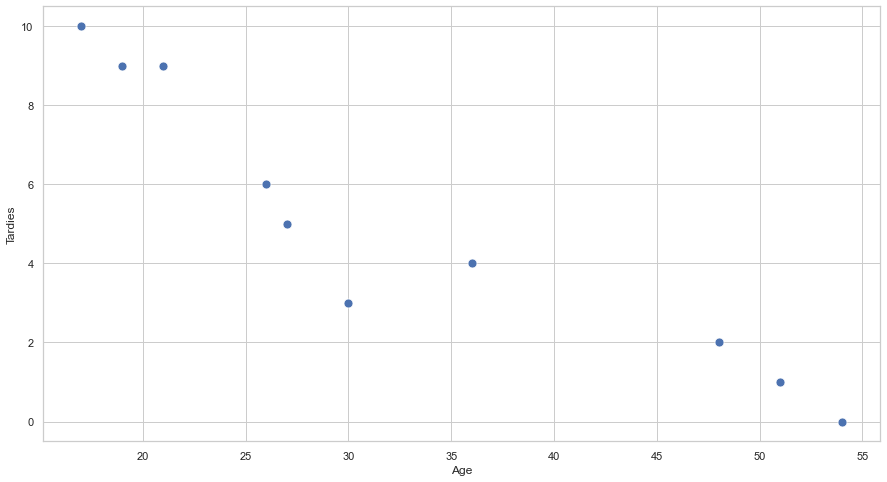

In [3]:
sns.scatterplot(data=student_data, x="Age", y="Tardies", s=80)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# I seems like there is a trend, the higher the age, the lower the tardies. 
# Or the other way around, the younger the student the more tardies.

# Hypothesis:
# Older Age --> Less tardies
# Younger Age --> More tardies

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [6]:
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [7]:
# It indicates that there exists a relationship between age and tardies, and in this case they are negatively related. 
# Which means that when one increases the other decreases.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [8]:
X = student_data[["Age"]] #Double brackets for scikit-learn
y = student_data["Tardies"]

lr_students = LinearRegression()
lr_students.fit(X, y)

student_data["Predicted_Tardies"] = lr_students.predict(X)

In [9]:
student_data

,Age,Tardies,Predicted_Tardies
0,17,10,8.760850
1,51,1,0.504944
2,27,5,6.332643
3,21,9,7.789567
4,36,4,4.147256
5,48,2,1.233406
6,19,9,8.275209
7,26,6,6.575463
8,54,0,-0.223518
9,30,3,5.604180


Plot your regression model on your scatter plot.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

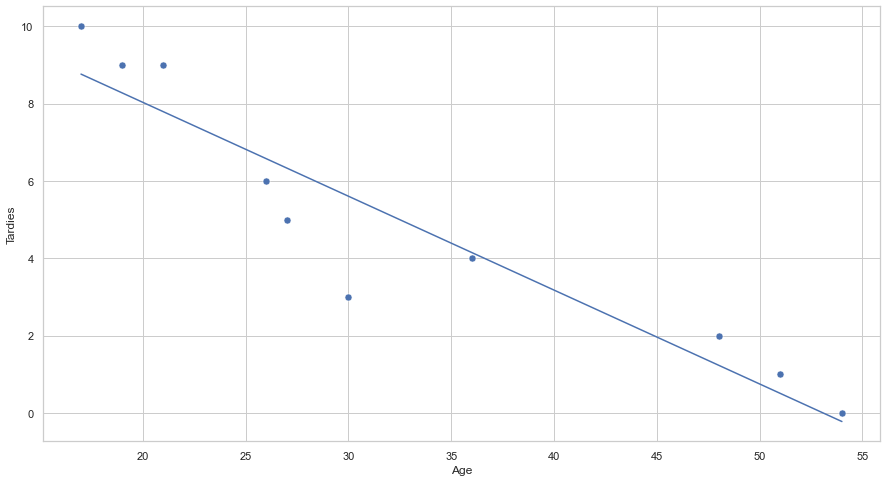

In [10]:
sns.scatterplot(data=student_data, x="Age", y="Tardies", s=50)
sns.lineplot(data=student_data ,x="Age" ,y="Predicted_Tardies")

Interpret the results of your model. What conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [11]:
r2_predicted_tardies = metrics.r2_score(student_data["Tardies"], student_data["Predicted_Tardies"])
r2_predicted_tardies

0.8820265558250109

In [12]:
# We can confidently say that the tardiness is inversely related with age, so yes, age is a good predictor of tardiness.
# However the data set is too small to generate a proper regression model.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [13]:
vehicles = pd.read_csv("./vehicles.csv")

In [14]:
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [15]:
vehicles_filtered = vehicles[["Year", "Cylinders", "Fuel Barrels/Year","Combined MPG", "Fuel Cost/Year", "CO2 Emission Grams/Mile"]]
vehicles_filtered.head()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500


In [16]:
vehicles_filtered.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


In [17]:
# Fuel Barrels per year is the most important in determining CO2 emissions
# Year provides the least amount of information.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [18]:
X = vehicles_filtered[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]] #Double brackets for scikit-learn
y = vehicles_filtered["CO2 Emission Grams/Mile"]

lr_vehicles = LinearRegression()
lr_vehicles.fit(X, y)

vehicles_filtered["Predicted_CO2_Emission"] = lr_vehicles.predict(X)

C:\Users\Marc\AppData\Local\Temp\ipykernel_15532\726369322.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicles_filtered["Predicted_CO2_Emission"] = lr_vehicles.predict(X)


In [19]:
vehicles_filtered

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile,Predicted_CO2_Emission
0,1984,4.0,19.388824,17,1950,522.764706,522.030384
1,1984,6.0,25.354615,13,2550,683.615385,671.001053
2,1985,4.0,20.600625,16,2100,555.437500,552.684951
3,1985,6.0,25.354615,13,2550,683.615385,670.680436
4,1987,6.0,20.600625,16,2550,555.437500,570.340582
...,...,...,...,...,...,...,...
35947,2013,3.0,9.155833,36,1100,244.000000,230.654658
35948,2014,3.0,9.155833,36,1100,243.000000,230.334041
35949,2015,3.0,9.155833,36,1100,244.000000,230.013424
35950,2016,3.0,9.155833,36,1100,246.000000,229.692808


In [20]:
mae = metrics.mean_absolute_error(vehicles_filtered["CO2 Emission Grams/Mile"], vehicles_filtered["Predicted_CO2_Emission"])
mse = metrics.mean_squared_error(vehicles_filtered["CO2 Emission Grams/Mile"], vehicles_filtered["Predicted_CO2_Emission"])
rmse = np.sqrt(metrics.mean_squared_error(vehicles_filtered["CO2 Emission Grams/Mile"], vehicles_filtered["Predicted_CO2_Emission"]))
r2 = metrics.r2_score(vehicles_filtered["CO2 Emission Grams/Mile"], vehicles_filtered["Predicted_CO2_Emission"])

print(f"Mean absolute error: {mae}\nMean squared error: {mse}\nMean error: {rmse}\nr2: {r2}")

Mean absolute error: 7.48766880712105
Mean squared error: 271.1196550702998
Mean error: 16.46571149602409
r2: 0.9808734920269122


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [21]:
vehicles_results = smf.ols("vehicles_filtered['CO2 Emission Grams/Mile'] ~ Year + Cylinders + vehicles_filtered['Fuel Barrels/Year'] + vehicles_filtered['Combined MPG'] + vehicles_filtered['Fuel Cost/Year']", data=vehicles_filtered).fit()
vehicles_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         OLS Regression Results                                         
========================================================================================================
Dep. Variable:     vehicles_filtered['CO2 Emission Grams/Mile']   R-squared:                       0.981
Model:                                                      OLS   Adj. R-squared:                  0.981
Method:                                           Least Squares   F-statistic:                 3.687e+05
Date:                                          Tue, 08 Nov 2022   Prob (F-statistic):               0.00
Time:                                                  18:07:18   Log-Likelihood:            -1.5173e+05
No. Observations:                                         35952   AIC:                         3.035e+05
Df Residuals:                                             35946   BIC:                         3.035e+05
Df Model:                                                     5                                         
Covariance Type:                                      nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                769.8883     19.392     39.702      0.000     731.880     807.897
Year                                      -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders                                  1.8788      0.083     22.598      0.000       1.716       2.042
vehicles_filtered['Fuel Barrels/Year']    19.0529      0.061    311.600      0.000      18.933      19.173
vehicles_filtered['Combined MPG']         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
vehicles_filtered['Fuel Cost/Year']        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
# The regression made is a very good predictor since its r2 is very high 0.981
# All the variables are significant since their p_value (P>|t|) is 0
# The most important variable is "Fuel Barrels/Years" since its coef is the highest

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [23]:
data_dic = {"Invited":[1,3,4,6,8,9,11,14], "Attended":[1,2,4,4,5,7,8,13]}
party_data = pd.DataFrame(data_dic)

In [24]:
party_data = party_data.assign(Did_Not_Attend = lambda x: (x['Invited'] - x['Attended']))

In [25]:
party_data = party_data.assign(percentage_attended = lambda x: (x['Attended']/x['Invited']))

In [26]:
party_data

,Invited,Attended,Did_Not_Attend,percentage_attended
0,1,1,0,1.000000
1,3,2,1,0.666667
2,4,4,0,1.000000
3,6,4,2,0.666667
4,8,5,3,0.625000
5,9,7,2,0.777778
6,11,8,3,0.727273
7,14,13,1,0.928571


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [27]:
X = party_data[["Invited"]] #Double brackets for scikit-learn
y = party_data["Attended"]

lr_party = LinearRegression()
lr_party.fit(X, y)

party_data["Predicted_Attended"] = lr_party.predict(X)

In [28]:
party_data

,Invited,Attended,Did_Not_Attend,percentage_attended,Predicted_Attended
0,1,1,0,1.000000,0.409091
1,3,2,1,0.666667,2.106061
2,4,4,0,1.000000,2.954545
3,6,4,2,0.666667,4.651515
4,8,5,3,0.625000,6.348485
5,9,7,2,0.777778,7.196970
6,11,8,3,0.727273,8.893939
7,14,13,1,0.928571,11.439394


<AxesSubplot:xlabel='Invited', ylabel='Attended'>

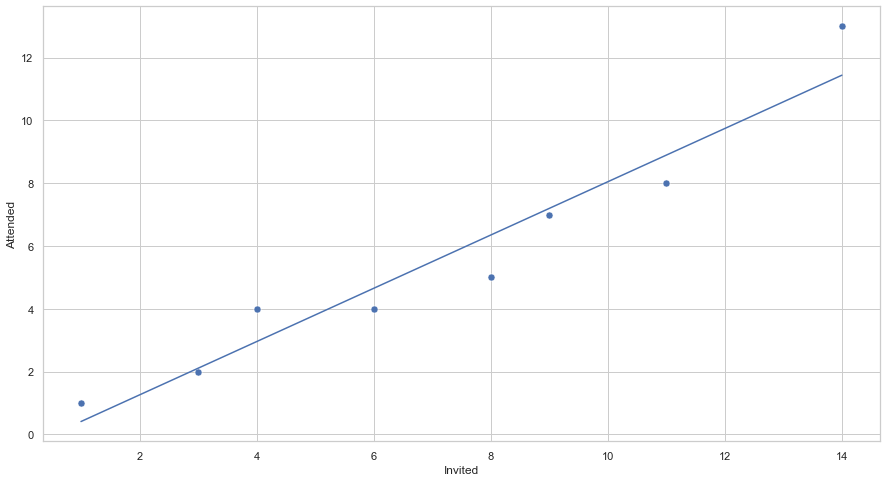

In [30]:
sns.scatterplot(data=party_data, x="Invited", y="Attended", s=50)
sns.lineplot(data=party_data ,x="Invited" ,y="Predicted_Attended")

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 